<a href="https://colab.research.google.com/github/RedeemerNtumy/JCPennyConsultancyProject/blob/master/3549063_BD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# University of Stirling

# ITNPBD2 Representing and Manipulating Data

# Assignment Autumn 2025

# A Consultancy Job for JC Penney

This notebook forms the assignment instructions and submission document of the assignment for ITNPBD2. Read the instructions carefully and enter code into the cells as indicated.

You will need these five files, which were in the Zip file you downloaded from the course webpage:

- jcpenney_reviewers.json
- jcpenney_products.json
- products.csv
- reviews.csv
- users.csv

The data in these files describes products that have been sold by the American retail giant, JC Penney, and reviews by customers who bought them. Note that the product data is real, but the customer data is synthetic.

Your job is to process the data, as requested in the instructions in the markdown cells in this notebook.

# Completing the Assignment

Rename this file to be xxxxxx_BD2 where xxxxxx is your student number, then type your code and narrative description into the boxes provided. Add as many code and markdown cells as you need. The cells should contain:

- **Text narrative describing what you did with the data**
- **The code that performs the task you have described**
- **Comments that explain your code**

The final structure (in PDF) of your report must:
- **Start from the main insights observed (max 5 pages)**
- **Include as an appendix the source code used for producing those insights (max 15 pages)**
- **Include an AI cover sheet (provided on Canvas), which must contain a link to a versioned notebook file in OneDrive or another platform for version checks.**

# Marking Scheme
The assessment will be marked against the university Common Marking Scheme (CMS)

Here is a summary of what you need to achieve to gain a grade in the major grade bands:

|Grade|Requirement|
|:---|:---|
| Fail | You will fail if your code does not run or does not achieve even the basics of the task. You may also fail if you submit code without either comments or a text explanation of what the code does.|
| Pass | To pass, you must submit sufficient working code to show that you have mastered the basics of the task, even if not everything works completely. You must include some justifications for your choice of methods, but without mentioning alternatives. |
| Merit | For a merit, your code must be mostly correct, with only small problems or parts missing, and your comments must be useful rather than simply re-stating the code in English. Most choices for methods and structures should be explained and alternatives mentioned. |
| Distinction | For a distinction, your code must be working, correct, and well commented and shows an appreciation of style, efficiency and reliability. All choices for methods and structures are concisely justified and alternatives are given well thought considerations. For a distinction, your work should be good enough to present to executives at the company.|

The full details of the CMS can be found here

https://www.stir.ac.uk/about/professional-services/student-academic-and-corporate-services/academic-registry/academic-policy-and-practice/quality-handbook/assessment-policy-and-procedure/appendix-2-postgraduate-common-marking-scheme/

Note that this means there are not certain numbers of marks allocated to each stage of the assignment. Your grade will reflect how well your solutions and comments demonstrate that you have achieved the learning outcomes of the task.

## Submission
When you are ready to submit, **print** your notebook as PDF (go to File -> Print Preview) in the Jupyter menu. Make sure you have run all the cells and that their output is displayed. Any lines of code or comments that are not visible in the pdf should be broken across several lines. You can then submit the file online.

Late penalties will apply at a rate of three marks per day, up to a maximum of 7 days. After 7 days you will be given a mark of 0. Extensions will be considered under acceptable circumstances outside your control.

## Academic Integrity

This is an individual assignment, and so all submitted work must be fully your own work.

The University of Stirling is committed to protecting the quality and standards of its awards. Consequently, the University seeks to promote and nurture academic integrity, support staff academic integrity, and support students to understand and develop good academic skills that facilitate academic integrity.

In addition, the University deals decisively with all forms of Academic Misconduct.

Where a student does not act with academic integrity, their work or behaviour may demonstrate Poor Academic Practice or it may represent Academic Misconduct.

### Poor Academic Practice

Poor Academic Practice is defined as: "The submission of any type of assessment with a lack of referencing or inadequate referencing which does not effectively acknowledge the origin of words, ideas, images, tables, diagrams, maps, code, sound and any other sources used in the assessment."

### Academic Misconduct

Academic Misconduct is defined as: "any act or attempted act that does not demonstrate academic integrity and that may result in creating an unfair academic advantage for you or another person, or an academic disadvantage for any other member or member of the academic community."

Plagiarism is presenting somebody else’s work as your own **and includes the use of artificial intelligence tools beyond AIAS Level 2 or the use of Large Language Models.**. Plagiarism is a form of academic misconduct and is taken very seriously by the University. Students found to have plagiarised work can have marks deducted and, in serious cases, even be expelled from the University. Do not submit any work that is not entirely your own. Do not collaborate with or get help from anybody else with this assignment.

The University of Stirling's full policy on Academic Integrity can be found at:

https://www.stir.ac.uk/about/professional-services/student-academic-and-corporate-services/academic-registry/academic-policy-and-practice/quality-handbook/academic-integrity-policy-and-academic-misconduct-procedure/

## The Assignment
Your task with this assignment is to use the data provided to demonstrate your Python data manipulation skills.

There are three `.csv` files and two `.json` files so you can process different types of data. The files also contain unstructured data in the form of natural language in English and links to images that you can access from the JC Penney website (use the field called `product_image_urls`).

Start with easy tasks to show you can read in a file, create some variables and data structures, and manipulate their contents. Then move onto something more interesting.

Look at the data that we provided with this assessment and think of something interesting to do with it using whatever libraries you like. Describe what you decide to do with the data and why it might be interesting or useful to the company to do it.

You can add additional data if you need to - either download it or access it using `requests`. Produce working code to implement your ideas in as many cells as you need below. There is no single right answer, the aim is to simply show you are competent in using python for data analysis. Exactly how you do that is up to you.

For a distinction class grade, this must show originality, creative thinking, and insights beyond what you've been taught directly on the module.

## Structure
You may structure the appendix of the project how you wish, but here is a suggested guideline to help you organise your work, based on the CRISP-DM data science methodology:

 1. **Business understanding** - What business context is the data coming from? What insights would be valuable in that context, and what data would be required for that purporse?
 2. **Data understanding and preparation** - Explore the data and show you understand its structure and relations, with the aid of appropriate visualisation techniques. Assess the data quality, which insights you would be able to answer from it, and what preparation the data would require. Add new data from another source if required to bring new insights to the data you already have.
 3. **Data modeling (optional)** - Would modeling be required for the insights you have considered? Use appropriate techniques, if so.
 4. **Evaluation and deployment** - How do the insights you obtained help the company, and how can should they be adopted in their business? If modeling techniques have been adopted, are their use scientifically sound and how should they be mantained?

# Remember to make sure you are working completely on your own.
# Don't work in a group or with a friend


In [86]:
# Put your code and comments in cells below here
# Add as many cells as you need

### First Step is to load the files

To do that, I would need to import all the necessary libraries



In [87]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [88]:
#Importing the csv files

products = pd.read_csv("products.csv")
reviews = pd.read_csv("reviews.csv")
users = pd.read_csv("users.csv")

In [89]:
users.head()

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho
3,hkxj1334,03.08.1969,Florida
4,jjbd1412,26.07.2001,Georgia


In [90]:
users.describe()

,Username,DOB,State
count,5000,5000,5000
unique,4999,52,57
top,dqft3311,07.08.1953,Massachusetts
freq,2,112,107


In [91]:
users.isna().sum()

,0
Username,0
DOB,0
State,0


There are no null values so we would check a few more information before we check the other data to see if there are any missing data so we handle them before we go into exploration


In [92]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Username  5000 non-null   object
 1   DOB       5000 non-null   object
 2   State     5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [93]:
products.head()

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


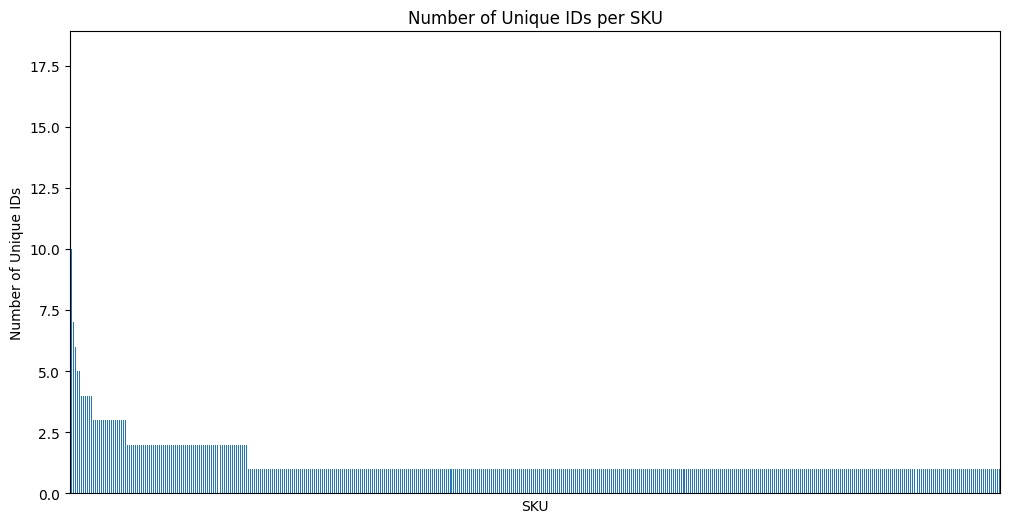

In [94]:
# Count the occurrences of each SKU
sku_counts = products['SKU'].value_counts()

# Plot the distribution of SKU counts
plt.figure(figsize=(12, 6))
sku_counts.plot(kind='bar')
plt.title('Number of Unique IDs per SKU')
plt.xlabel('SKU')
plt.ylabel('Number of Unique IDs')
plt.xticks([]) # Hide x-axis labels for better readability if there are many SKUs
plt.show()

In [95]:
products.describe()

,Price,Av_Score
count,5816.000000,7982.000000
mean,144.776618,2.988683
std,499.223719,0.911673
min,-65.270000,1.000000
25%,40.700000,2.500000
50%,58.010000,3.000000
75%,87.020000,3.500000
max,17122.170000,5.000000


In [96]:
products.isna().sum()

,0
Uniq_id,0
SKU,67
Name,0
Description,543
Price,2166
Av_Score,0


In [97]:
# Display rows with missing SKU values
missing_sku_rows = products[products['SKU'].isna()]
display(missing_sku_rows)

,Uniq_id,SKU,Name,Description,Price,Av_Score
212,ada678a4523077b3bc62f9f418972507,NaN,Aroma® Electric Wok,This sleek metal wok from Aroma is designed to...,83.56,2.000000
216,97d2d2ce9f22fb3218f724324097d988,NaN,Despicable Me Hat and Mittens Set - Boys,Dominate cold-weather days with this cozy hat ...,NaN,3.500000
218,6d3177f25b852be96c858f2d85f37f4c,NaN,Monet® Gold-Tone Coiled Sphere Drop Earrings,Add a dash of élan to your look with ultra-mod...,NaN,4.000000
219,08daf20a62b797053019a926687abb53,NaN,O/X-Back Set of 3 Adjustable Barstools,"The simple, sleek design of this barstool set ...",493.25,1.000000
220,fc213145168faa94bae198f173d27796,NaN,Frigidaire® Professional Panini Grill/Griddle,Prepare all your favorite foods at home with t...,226.31,1.833333
...,...,...,...,...,...,...
7764,7c84f3b2ded021a89585d9fb2feb499b,NaN,Ninja ® Coffee Bar™,This fully loaded coffee bar will make anythin...,327.43,4.000000
7769,a318ae67b92bb8bb7dc11d5c6ce6217a,NaN,Disney Womens Snow White Rose-Tone Black Ename...,This Snow White watch is a perfect choice for ...,69.17,1.000000
7773,82ab722bb511148cb9925d6bf63a2006,NaN,Cooks Color Expressions 12-pc. Nonstick Cookwa...,Tackle any cooking challenge with our 12-piece...,184.48,4.500000
7779,aab2f41dc9e92b44945ccad3774c10ad,NaN,Brondell H2O+ Circle Reverse Osmosis System,Brondells Circle Reverse Osmosis water filtrat...,709.10,2.000000


So for here I wanted to find out if a similar Product Name had the SKU entered. If it was, I would have updated that Null value with it. However I did not find anyone like that. The ones with more than one occurence did not have sku too

In [98]:
missing_sku_rows = products[products['SKU'].isna()]

name_counts = missing_sku_rows['Name'].value_counts()

duplicate_names = name_counts[name_counts > 1].index

duplicate_name_missing_sku_rows = missing_sku_rows[missing_sku_rows['Name'].isin(duplicate_names)]

display(duplicate_name_missing_sku_rows)

,Uniq_id,SKU,Name,Description,Price,Av_Score
4880,31babfaed4ea91bc810afe3e2d04d19d,NaN,dom by dominique cohen Gold-Tone Textured Dagg...,Toughen up with a cutting-edge pair of brass d...,75.51,1.500
4883,8460df17307111e9d2b56a2df11f5177,NaN,dom by dominique cohen Gold-Tone Textured Dagg...,Toughen up with a cutting-edge pair of brass d...,71.53,2.000
4897,a9861148829d25894572e39e00e84af3,NaN,10K Yellow Gold Hollow 24” Rope Chain,This 24” rope chain in 10K gold offers a timel...,476.98,3.875
7442,d0c3bce0b5299cd03bf4236aef9f57b0,NaN,10K Yellow Gold Hollow 24” Rope Chain,This 24” rope chain in 10K gold offers a timel...,476.98,2.125


In [99]:
products["SKU"] = products["SKU"].fillna("MISSING_SKU")

In [100]:
products.isna().sum()

,0
Uniq_id,0
SKU,0
Name,0
Description,543
Price,2166
Av_Score,0


I would have to use VPN for USA for scraping since the website is not available in UK

In [101]:
products[products["Description"].isna() ==True]

,Uniq_id,SKU,Name,Description,Price,Av_Score
8,44f8f8f108c6856acf9630dd1d78516d,pp5007080134,Alfred Dunner® Feels Like Spring 3/4-Sleeve Wa...,NaN,NaN,4.500
9,8d1d057f5f808c10ce243c222ab0ef6e,pp5007080134,Alfred Dunner® Feels Like Spring 3/4-Sleeve Wa...,NaN,NaN,2.500
10,f3e02c48f16b56e8c1f126c8fe762812,pp5007080134,Alfred Dunner® Feels Like Spring 3/4-Sleeve Wa...,NaN,NaN,1.000
15,8149f96381ad38bc848c1c12b7ad3228,pp5007080135,Alfred Dunner® Feels Like Spring Short-Sleeve ...,NaN,NaN,4.000
16,ca3aed29b3601cfa80af58a05997dde4,pp5007080135,Alfred Dunner® Feels Like Spring Short-Sleeve ...,NaN,NaN,4.000
...,...,...,...,...,...,...
7928,79adc05ffe52ac0a389b3eeed4e0969f,pp5006333491,LG Super Capacity French-Door 4-pc. Kitchen Pa...,NaN,NaN,4.000
7934,43b452a236365e5fc3497e7b51483659,pp5006020682,Harbor House Meadow 3-pc. Duvet Cover Set & Ac...,NaN,NaN,4.000
7946,d9247814928a7d100027ec892b341dd1,pp5002860138,Micro Flannel® Solid Sheet Set,NaN,NaN,3.125
7980,9887bb20c12be3c09d094e97ac8d22be,pp5005921226,Hope Chest Embroidered Quilt & Accessories,NaN,NaN,3.500


Product urls don't work anymore so can't scrape description

In [102]:
products["Description"] = products["Description"].fillna("MISSING_DESCRIPTION")

In [103]:
products.isna().sum()

,0
Uniq_id,0
SKU,0
Name,0
Description,0
Price,2166
Av_Score,0


In [104]:
products_with_null_price = products[products["Price"].isna()== True]

In [105]:
def open_json(json_name):
  with open (json_name, "r") as f:
    for line in f:
      yield line

json_products = open_json("jcpenney_products.json")
next(json_products)

'{"uniq_id": "b6c0b6bea69c722939585baeac73c13d", "sku": "pp5006380337", "name_title": "Alfred Dunner\\u00ae Essential Pull On Capri Pant", "description": "You\'ll return to our Alfred Dunner pull-on capris again and again when you want an updated, casual look and all the comfort you love. \\u00a0 elastic waistband approx. 19-21\\" inseam slash pockets polyester washable imported \\u00a0 \\u00a0 \\u00a0", "list_price": "41.09", "sale_price": "24.16", "category": "alfred dunner", "category_tree": "jcpenney|women|alfred dunner", "average_product_rating": 2.625, "product_url": "http://www.jcpenney.com/alfred-dunner-essential-pull-on-capri-pant/prod.jump?ppId=pp5006380337&catId=cat1002110079&&_dyncharset=UTF-8&urlState=/women/shop-brands/alfred-dunner/yellow/_/N-gkmp33Z132/cat.jump", "product_image_urls": "http://s7d9.scene7.com/is/image/JCPenney/DP1228201517142050M.tif?hei=380&amp;wid=380&op_usm=.4,.8,0,0&resmode=sharp2&op_usm=1.5,.8,0,0&resmode=sharp", "brand": "Alfred Dunner", "total_num

In [106]:
next(json_products)

'{"uniq_id": "93e5272c51d8cce02597e3ce67b7ad0a", "sku": "pp5006380337", "name_title": "Alfred Dunner\\u00ae Essential Pull On Capri Pant", "description": "You\'ll return to our Alfred Dunner pull-on capris again and again when you want an updated, casual look and all the comfort you love. \\u00a0 elastic waistband approx. 19-21\\" inseam slash pockets polyester washable imported \\u00a0 \\u00a0 \\u00a0", "list_price": "41.09", "sale_price": "24.16", "category": "alfred dunner", "category_tree": "jcpenney|women|alfred dunner", "average_product_rating": 3.0, "product_url": "http://www.jcpenney.com/alfred-dunner-essential-pull-on-capri-pant/prod.jump?ppId=pp5006380337&catId=cat1002310017&&_dyncharset=UTF-8&urlState=/women/specialty-sizing/petites/shop-brands/alfred-dunner/10-petite/_/N-gkqzcxZ1z1407s/cat.jump", "product_image_urls": "http://s7d9.scene7.com/is/image/JCPenney/DP1228201517142050M.tif?hei=380&amp;wid=380&op_usm=.4,.8,0,0&resmode=sharp2&op_usm=1.5,.8,0,0&resmode=sharp", "brand

In [107]:
import pandas as pd
import json

# Define the file name
json_file = 'jcpenney_products.json'
json_data = []

# 1. Load the JSON data line by line and extract the required fields
# The file is a JSONL (JSON Lines) format, so each line is a separate JSON object.
try:
    with open(json_file, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                # Load the JSON object from the line
                product = json.loads(line)

                # Extract and structure the required data points
                json_data.append({
                    'uniq_id': product.get('uniq_id'),
                    'list_price': product.get('list_price'),
                    'sale_price': product.get('sale_price'),
                    'category_tree': product.get('category_tree'),
                    # Calculate the number of reviews directly from the list length
                    'total_number_reviews': len(product.get('Reviews', []))
                })
            except json.JSONDecodeError as e:
                print(f"Skipping line due to JSON decoding error: {e}")

except FileNotFoundError:
    print(f"Error: The file {json_file} was not found.")
    # Exit or raise error if the file is essential

# 2. Create the DataFrame
df_json_extracted = pd.DataFrame(json_data)

# 3. Clean Price Columns (Remove symbols and convert to numeric)
def clean_price(price_series):
    # Remove currency symbols/commas and convert to numeric
    # Errors='coerce' will turn non-cleanable strings (like "None" or N/A) into NaN
    return pd.to_numeric(price_series.astype(str).str.replace(r'[$,]', '', regex=True), errors='coerce')

df_json_extracted['list_price'] = clean_price(df_json_extracted['list_price'])
df_json_extracted['sale_price'] = clean_price(df_json_extracted['sale_price'])

# 4. Display the results
print(f"DataFrame created successfully with {len(df_json_extracted)} records.")
print("\nDataFrame Information:")
df_json_extracted.info()
print("\nFirst 5 rows of the extracted JSON data:")
print(df_json_extracted.head())

Skipping line due to JSON decoding error: Extra data: line 1 column 671 (char 670)
Skipping line due to JSON decoding error: Expecting value: line 1 column 12 (char 11)
Skipping line due to JSON decoding error: Expecting ',' delimiter: line 2 column 1 (char 4868)
Skipping line due to JSON decoding error: Expecting ',' delimiter: line 1 column 2841 (char 2840)
Skipping line due to JSON decoding error: Expecting ',' delimiter: line 2 column 1 (char 6376)
Skipping line due to JSON decoding error: Extra data: line 1 column 1527 (char 1526)
Skipping line due to JSON decoding error: Expecting value: line 1 column 12 (char 11)
Skipping line due to JSON decoding error: Extra data: line 1 column 723 (char 722)
Skipping line due to JSON decoding error: Expecting value: line 1 column 12 (char 11)
Skipping line due to JSON decoding error: Extra data: line 1 column 873 (char 872)
Skipping line due to JSON decoding error: Expecting ',' delimiter: line 1 column 1655 (char 1654)
Skipping line due to J

In [108]:
df_json_extracted

,uniq_id,list_price,sale_price,category_tree,total_number_reviews
0,b6c0b6bea69c722939585baeac73c13d,41.09,24.16000,jcpenney|women|alfred dunner,8
1,93e5272c51d8cce02597e3ce67b7ad0a,41.09,24.16000,jcpenney|women|alfred dunner,8
2,013e320f2f2ec0cf5b3ff5418d688528,41.09,24.16000,jcpenney|women|view all,8
3,505e6633d81f2cb7400c0cfa0394c427,41.09,24.16000,jcpenney|women|view all,8
4,d969a8542122e1331e304b09f81a83f6,41.09,24.16000,jcpenney|women|view all,8
...,...,...,...,...,...
38276,16e3ca6b6a2d3f5da9a81df6cfe7e27a,201.97,130.67000,jcpenney|for-the-home|view all brands,8
38277,209bec04d9f194616358a77d7b41b314,201.97,130.67000,jcpenney|for-the-home|sale,8
38278,7a8a7cba7b69b4c46ceac1d9666d84f0,201.97,130.67000,jcpenney|for-the-home|vacuums & floorcare,8
38279,9887bb20c12be3c09d094e97ac8d22be,NaN,35.63142,jcpenney|bed-bath|comforters & bedding sets,8


In [114]:
merged_products.isna().sum()

,0
Uniq_id,0
SKU,0
Name,0
Description,0
Price,10289
Av_Score,0
uniq_id,2
list_price,10297
sale_price,1242


In [111]:
)# Select and display the requested columns from the jcpenney_products DataFrame
display(jcpenney_products[['list_price', 'sale_price', 'category_tree']])

NameError: name 'jcpenney_products' is not defined

In [ ]:
products.info()

In [ ]:
reviews.head()

In [ ]:
reviews.describe()

In [ ]:
reviews.isna().sum()

In [ ]:
#Importing the json files

def open_json(json_name):
  with open (json_name, "r") as f:
    for line in f:
      return json.loads(f)

In [ ]:
pd.read_json("jcpenney_products.json", lines=True)

In [ ]:
# jcpenney_products = open_json("jcpenney_products.json")
jcpenney_reviewers = pd.read_json("jcpenney_reviewers.json")